# 📊 ANÁLISE COMPLETA DE VENDAS - DASHBOARD INTERATIVO

---

## 🎯 **OBJETIVO DO PROJETO**

**Transformar dados brutos de vendas em insights acionáveis para tomada de decisão comercial**

### 📋 **Principais Perguntas de Negócio:**
- 🏆 Quais produtos vendem mais?
- 🌎 Quais regiões performam melhor?
- 📈 Qual período gera mais lucro?
- 💰 Onde existem oportunidades de melhoria?
- 👥 Quem são nossos melhores clientes?

### 🛠️ **Tecnologias Utilizadas:**
- **Python** - Linguagem principal
- **Pandas** - Manipulação de dados
- **Matplotlib/Seaborn** - Visualizações estáticas
- **Plotly** - Gráficos interativos
- **NumPy** - Computação numérica

---

## 🔧 **1. CONFIGURAÇÃO DO AMBIENTE**

### Instalação das bibliotecas necessárias e configuração inicial

In [18]:
# 📦 INSTALAÇÃO DAS BIBLIOTECAS NECESSÁRIAS
# Execute apenas se as bibliotecas não estiverem instaladas

!pip install pandas numpy matplotlib seaborn plotly jupyter

print("✅ Instalação concluída!")

✅ Instalação concluída!



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
# 📚 IMPORTAÇÃO DAS BIBLIOTECAS
# Carregando todas as ferramentas necessárias para análise

import pandas as pd                    # Manipulação de dados
import numpy as np                     # Computação numérica
import matplotlib.pyplot as plt        # Gráficos estáticos
import seaborn as sns                  # Visualizações estatísticas
import plotly.express as px            # Gráficos interativos rápidos
import plotly.graph_objects as go      # Gráficos interativos customizados
from plotly.subplots import make_subplots  # Subplots interativos
import warnings
from datetime import datetime

# 🎨 CONFIGURAÇÕES DE VISUALIZAÇÃO
warnings.filterwarnings('ignore')      # Suprimir avisos desnecessários
plt.style.use('default')               # Estilo padrão do matplotlib
sns.set_palette("husl")                # Paleta de cores do seaborn
pd.set_option('display.max_columns', None)  # Mostrar todas as colunas
pd.set_option('display.width', None)        # Largura ilimitada
pd.set_option('display.max_rows', 100)      # Máximo 100 linhas

# 📊 CONFIGURAÇÕES PLOTLY
import plotly.io as pio
pio.templates.default = "plotly_white"  # Template limpo

print("✅ Bibliotecas importadas com sucesso!")
print(f"📅 Análise executada em: {datetime.now().strftime('%d/%m/%Y às %H:%M')}")

✅ Bibliotecas importadas com sucesso!
📅 Análise executada em: 29/01/2026 às 19:42


---

## 📥 **2. CARREGAMENTO E EXPLORAÇÃO INICIAL DOS DADOS**

### Vamos carregar nosso dataset e fazer uma primeira exploração para entender a estrutura dos dados

In [20]:
# 📊 CARREGAMENTO DO DATASET
# Carregando os dados de vendas do arquivo CSV

try:
    df = pd.read_csv("../data/sales_data.csv")
    print("✅ Dataset carregado com sucesso!")
except FileNotFoundError:
    # Tentar caminho alternativo
    df = pd.read_csv("sales_data.csv")
    print("✅ Dataset carregado com sucesso (caminho alternativo)!")

# 📋 INFORMAÇÕES BÁSICAS DO DATASET
print("\n" + "="*80)
print("📊 INFORMAÇÕES GERAIS DO DATASET")
print("="*80)
print(f"📈 Número total de registros: {len(df):,}")
print(f"📊 Número de colunas: {len(df.columns)}")
print(f"📅 Período dos dados: {df['order_date'].min()} até {df['order_date'].max()}")
print(f"💾 Tamanho em memória: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n🔍 ESTRUTURA DAS COLUNAS:")
print("-" * 50)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col:<15} - {df[col].dtype}")

print("\n📋 PRIMEIRAS 5 LINHAS DO DATASET:")
print("-" * 50)
display(df.head())

✅ Dataset carregado com sucesso!

📊 INFORMAÇÕES GERAIS DO DATASET
📈 Número total de registros: 1,000
📊 Número de colunas: 10
📅 Período dos dados: 2025-01-29 até 2026-01-28
💾 Tamanho em memória: 0.44 MB

🔍 ESTRUTURA DAS COLUNAS:
--------------------------------------------------
 1. order_id        - object
 2. order_date      - object
 3. customer        - object
 4. product         - object
 5. category        - object
 6. region          - object
 7. quantity        - int64
 8. price           - float64
 9. revenue         - float64
10. profit          - float64

📋 PRIMEIRAS 5 LINHAS DO DATASET:
--------------------------------------------------


,order_id,order_date,customer,product,category,region,quantity,price,revenue,profit
0,ORD-000001,2025-12-22,Ana Costa,Notebook Dell,Computadores,Centro-Oeste,4,2223.21,8892.84,2199.15
1,ORD-000002,2026-01-10,Gabriela Cardoso,Teclado Mecânico,Periféricos,Sul,7,243.81,1706.67,202.65
2,ORD-000003,2025-05-28,Felipe Nascimento,Microfone USB,Áudio,Norte,9,263.86,2374.74,546.14
3,ORD-000004,2025-11-04,Carla Martins,Fone Bluetooth,Áudio,Sudeste,10,182.26,1822.60,499.14
4,ORD-000005,2025-04-20,Carla Martins,Memória RAM 16GB,Componentes,Centro-Oeste,3,354.45,1063.35,268.71


In [21]:
# 📊 ANÁLISE DETALHADA DA ESTRUTURA DOS DADOS
# Vamos entender melhor nossos dados antes de começar a análise

print("📊 INFORMAÇÕES DETALHADAS DAS COLUNAS:")
print("="*60)
df.info()

print("\n📈 ESTATÍSTICAS DESCRITIVAS (VARIÁVEIS NUMÉRICAS):")
print("="*60)
display(df.describe().round(2))

print("\n📊 CONTAGEM DE VALORES ÚNICOS POR COLUNA:")
print("="*60)
unique_counts = df.nunique().sort_values(ascending=False)
for col, count in unique_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{col:<15}: {count:>6,} valores únicos ({percentage:>5.1f}% do total)")

print("\n🎯 INSIGHTS INICIAIS:")
print("-" * 40)
print(f"• Temos {df['customer'].nunique()} clientes únicos")
print(f"• Oferecemos {df['product'].nunique()} produtos diferentes")
print(f"• Operamos em {df['region'].nunique()} regiões")
print(f"• Trabalhamos com {df['category'].nunique()} categorias de produtos")
print(f"• Período de análise: {(pd.to_datetime(df['order_date'].max()) - pd.to_datetime(df['order_date'].min())).days} dias")

📊 INFORMAÇÕES DETALHADAS DAS COLUNAS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    1000 non-null   object 
 1   order_date  1000 non-null   object 
 2   customer    1000 non-null   object 
 3   product     1000 non-null   object 
 4   category    1000 non-null   object 
 5   region      1000 non-null   object 
 6   quantity    1000 non-null   int64  
 7   price       1000 non-null   float64
 8   revenue     1000 non-null   float64
 9   profit      1000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB

📈 ESTATÍSTICAS DESCRITIVAS (VARIÁVEIS NUMÉRICAS):


,quantity,price,revenue,profit
count,1000.00,1000.00,1000.00,1000.00
mean,5.38,732.37,4049.20,835.36
std,2.88,941.17,6400.96,1445.59
min,1.00,40.14,41.95,6.14
25%,3.00,172.60,612.08,117.77
50%,5.00,345.45,1713.36,307.15
75%,8.00,800.42,4151.09,862.43
max,10.00,4179.43,40198.30,10957.35



📊 CONTAGEM DE VALORES ÚNICOS POR COLUNA:
order_id       :  1,000 valores únicos (100.0% do total)
revenue        :    998 valores únicos ( 99.8% do total)
profit         :    993 valores únicos ( 99.3% do total)
price          :    991 valores únicos ( 99.1% do total)
order_date     :    335 valores únicos ( 33.5% do total)
customer       :     20 valores únicos (  2.0% do total)
product        :     20 valores únicos (  2.0% do total)
category       :     13 valores únicos (  1.3% do total)
quantity       :     10 valores únicos (  1.0% do total)
region         :      5 valores únicos (  0.5% do total)

🎯 INSIGHTS INICIAIS:
----------------------------------------
• Temos 20 clientes únicos
• Oferecemos 20 produtos diferentes
• Operamos em 5 regiões
• Trabalhamos com 13 categorias de produtos
• Período de análise: 364 dias


---

## 🧹 **3. QUALIDADE E LIMPEZA DOS DADOS**

### Verificando a qualidade dos dados e realizando limpeza quando necessário

In [22]:
# 🔍 VERIFICAÇÃO DA QUALIDADE DOS DADOS
# Identificando problemas potenciais nos dados

print("🔍 ANÁLISE DE QUALIDADE DOS DADOS")
print("="*50)

# Verificar valores nulos
print("\n❌ VALORES NULOS POR COLUNA:")
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100

for col in df.columns:
    nulls = null_counts[col]
    pct = null_percentages[col]
    status = "✅ OK" if nulls == 0 else f"⚠️  {nulls:,} ({pct:.1f}%)"
    print(f"{col:<15}: {status}")

# Verificar duplicatas
duplicates = df.duplicated().sum()
print(f"\n🔄 REGISTROS DUPLICADOS: {duplicates:,}")

# Verificar valores negativos em colunas que não deveriam ter
print("\n💰 VERIFICAÇÃO DE VALORES NEGATIVOS:")
numeric_cols = ['quantity', 'price', 'revenue', 'profit']
for col in numeric_cols:
    negative_count = (df[col] < 0).sum()
    status = "✅ OK" if negative_count == 0 else f"⚠️  {negative_count:,} valores negativos"
    print(f"{col:<15}: {status}")

# Verificar consistência entre price, quantity e revenue
print("\n🧮 VERIFICAÇÃO DE CONSISTÊNCIA (PRICE × QUANTITY = REVENUE):")
df['calculated_revenue'] = df['price'] * df['quantity']
inconsistent = (abs(df['revenue'] - df['calculated_revenue']) > 0.01).sum()
print(f"Registros inconsistentes: {inconsistent:,}")

if inconsistent == 0:
    print("✅ Todos os cálculos estão consistentes!")
else:
    print("⚠️  Encontradas inconsistências nos cálculos")

# Remover coluna temporária
df.drop('calculated_revenue', axis=1, inplace=True)

🔍 ANÁLISE DE QUALIDADE DOS DADOS

❌ VALORES NULOS POR COLUNA:
order_id       : ✅ OK
order_date     : ✅ OK
customer       : ✅ OK
product        : ✅ OK
category       : ✅ OK
region         : ✅ OK
quantity       : ✅ OK
price          : ✅ OK
revenue        : ✅ OK
profit         : ✅ OK

🔄 REGISTROS DUPLICADOS: 0

💰 VERIFICAÇÃO DE VALORES NEGATIVOS:
quantity       : ✅ OK
price          : ✅ OK
revenue        : ✅ OK
profit         : ✅ OK

🧮 VERIFICAÇÃO DE CONSISTÊNCIA (PRICE × QUANTITY = REVENUE):
Registros inconsistentes: 0
✅ Todos os cálculos estão consistentes!


In [23]:
# 🧹 LIMPEZA DOS DADOS
# Aplicando correções necessárias identificadas na análise de qualidade

print("🧹 PROCESSO DE LIMPEZA DOS DADOS")
print("="*40)

# Registrar tamanho original
original_size = len(df)
print(f"📊 Tamanho original do dataset: {original_size:,} registros")

# Remover valores nulos (se houver)
df_clean = df.dropna()
after_nulls = len(df_clean)
removed_nulls = original_size - after_nulls
print(f"❌ Registros removidos (nulos): {removed_nulls:,}")

# Remover duplicatas (se houver)
df_clean = df_clean.drop_duplicates()
after_duplicates = len(df_clean)
removed_duplicates = after_nulls - after_duplicates
print(f"🔄 Registros removidos (duplicatas): {removed_duplicates:,}")

# Converter tipos de dados apropriados
print("\n🔄 CONVERSÃO DE TIPOS DE DADOS:")
print("-" * 30)

# Converter order_date para datetime
df_clean['order_date'] = pd.to_datetime(df_clean['order_date'])
print("✅ order_date convertido para datetime")

# Converter colunas categóricas para category (otimização de memória)
categorical_cols = ['customer', 'product', 'category', 'region']
for col in categorical_cols:
    df_clean[col] = df_clean[col].astype('category')
    print(f"✅ {col} convertido para category")

# Resultado final da limpeza
final_size = len(df_clean)
total_removed = original_size - final_size
retention_rate = (final_size / original_size) * 100

print(f"\n📊 RESULTADO DA LIMPEZA:")
print("="*40)
print(f"📈 Dataset final: {final_size:,} registros")
print(f"🗑️  Total removido: {total_removed:,} registros")
print(f"✅ Taxa de retenção: {retention_rate:.1f}%")

# Usar dataset limpo como principal
df = df_clean.copy()
print("\n✅ LIMPEZA CONCLUÍDA COM SUCESSO!")

🧹 PROCESSO DE LIMPEZA DOS DADOS
📊 Tamanho original do dataset: 1,000 registros
❌ Registros removidos (nulos): 0
🔄 Registros removidos (duplicatas): 0

🔄 CONVERSÃO DE TIPOS DE DADOS:
------------------------------
✅ order_date convertido para datetime
✅ customer convertido para category
✅ product convertido para category
✅ category convertido para category
✅ region convertido para category

📊 RESULTADO DA LIMPEZA:
📈 Dataset final: 1,000 registros
🗑️  Total removido: 0 registros
✅ Taxa de retenção: 100.0%

✅ LIMPEZA CONCLUÍDA COM SUCESSO!


---

## ⚙️ **4. ENGENHARIA DE FEATURES**

### Criando novas variáveis para enriquecer nossa análise

In [24]:
# ⚙️ CRIAÇÃO DE NOVAS FEATURES
# Desenvolvendo variáveis que nos ajudarão a extrair mais insights

print("⚙️ ENGENHARIA DE FEATURES")
print("="*40)

print("\n📅 FEATURES TEMPORAIS:")
print("-" * 25)

# Features temporais
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.month_name()
df['day_of_week'] = df['order_date'].dt.dayofweek
df['day_name'] = df['order_date'].dt.day_name()
df['quarter'] = df['order_date'].dt.quarter
df['week_of_year'] = df['order_date'].dt.isocalendar().week

temporal_features = ['year', 'month', 'month_name', 'day_of_week', 'day_name', 'quarter', 'week_of_year']
for feature in temporal_features:
    print(f"✅ {feature}")

print("\n💰 FEATURES DE NEGÓCIO:")
print("-" * 25)

# Features de negócio
df['margin'] = df['profit'] / df['revenue']  # Margem de lucro
df['margin_percentage'] = df['margin'] * 100  # Margem em percentual
df['revenue_per_unit'] = df['revenue'] / df['quantity']  # Receita por unidade
df['profit_per_unit'] = df['profit'] / df['quantity']  # Lucro por unidade
df['price_markup'] = (df['price'] - (df['price'] - df['profit_per_unit'])) / (df['price'] - df['profit_per_unit'])  # Markup

business_features = ['margin', 'margin_percentage', 'revenue_per_unit', 'profit_per_unit']
for feature in business_features:
    print(f"✅ {feature}")

print("\n📊 FEATURES CATEGÓRICAS:")
print("-" * 25)

# Categorização de tickets
df['ticket_category'] = pd.cut(df['revenue'], 
                              bins=[0, 1000, 3000, 7000, float('inf')],
                              labels=['Baixo', 'Médio', 'Alto', 'Premium'])

# Categorização de margem
df['margin_category'] = pd.cut(df['margin_percentage'], 
                              bins=[0, 10, 20, 30, float('inf')],
                              labels=['Baixa', 'Média', 'Alta', 'Excelente'])

# Categorização de quantidade
df['quantity_category'] = pd.cut(df['quantity'], 
                                bins=[0, 1, 3, 5, float('inf')],
                                labels=['Unitário', 'Pequeno', 'Médio', 'Grande'])

categorical_features = ['ticket_category', 'margin_category', 'quantity_category']
for feature in categorical_features:
    print(f"✅ {feature}")

print(f"\n📊 RESUMO DA ENGENHARIA DE FEATURES:")
print("="*50)
print(f"📈 Colunas originais: {len(df.columns) - len(temporal_features) - len(business_features) - len(categorical_features)}")
print(f"⚙️  Features criadas: {len(temporal_features) + len(business_features) + len(categorical_features)}")
print(f"📊 Total de colunas: {len(df.columns)}")
print("\n✅ ENGENHARIA DE FEATURES CONCLUÍDA!")

⚙️ ENGENHARIA DE FEATURES

📅 FEATURES TEMPORAIS:
-------------------------
✅ year
✅ month
✅ month_name
✅ day_of_week
✅ day_name
✅ quarter
✅ week_of_year

💰 FEATURES DE NEGÓCIO:
-------------------------
✅ margin
✅ margin_percentage
✅ revenue_per_unit
✅ profit_per_unit

📊 FEATURES CATEGÓRICAS:
-------------------------
✅ ticket_category
✅ margin_category
✅ quantity_category

📊 RESUMO DA ENGENHARIA DE FEATURES:
📈 Colunas originais: 11
⚙️  Features criadas: 14
📊 Total de colunas: 25

✅ ENGENHARIA DE FEATURES CONCLUÍDA!


---

## 📊 **5. INDICADORES PRINCIPAIS DE PERFORMANCE (KPIs)**

### Calculando as métricas mais importantes para o negócio

In [25]:
# 📊 CÁLCULO DOS KPIS PRINCIPAIS
# Métricas fundamentais para entender a performance do negócio

print("📊 CALCULANDO INDICADORES DE PERFORMANCE (KPIs)")
print("="*60)

# KPIs Financeiros
total_revenue = df['revenue'].sum()
total_profit = df['profit'].sum()
avg_ticket = df['revenue'].mean()
median_ticket = df['revenue'].median()
avg_margin = df['margin_percentage'].mean()
total_cost = total_revenue - total_profit

# KPIs Operacionais
total_orders = len(df)
total_quantity = df['quantity'].sum()
avg_quantity_per_order = df['quantity'].mean()
unique_customers = df['customer'].nunique()
unique_products = df['product'].nunique()
unique_categories = df['category'].nunique()
unique_regions = df['region'].nunique()

# KPIs de Relacionamento
orders_per_customer = total_orders / unique_customers
revenue_per_customer = total_revenue / unique_customers
profit_per_customer = total_profit / unique_customers

# Exibir KPIs de forma organizada
print("\n💰 INDICADORES FINANCEIROS:")
print("="*70)
print(f"💵 Receita Total:           R$ {total_revenue:>15,.2f}")
print(f"📈 Lucro Total:             R$ {total_profit:>15,.2f}")
print(f"💸 Custo Total:             R$ {total_cost:>15,.2f}")
print(f"🎯 Ticket Médio:            R$ {avg_ticket:>15,.2f}")
print(f"📊 Ticket Mediano:          R$ {median_ticket:>15,.2f}")
print(f"📊 Margem Média:            {avg_margin:>18.1f}%")

print("\n📦 INDICADORES OPERACIONAIS:")
print("="*70)
print(f"🛒 Total de Pedidos:        {total_orders:>19,}")
print(f"📦 Quantidade Total:        {total_quantity:>19,} unidades")
print(f"📊 Qtd Média por Pedido:    {avg_quantity_per_order:>18.1f} unidades")
print(f"👥 Clientes Únicos:         {unique_customers:>19,}")
print(f"📋 Produtos Únicos:         {unique_products:>19,}")
print(f"🏷️  Categorias:              {unique_categories:>19,}")
print(f"🌎 Regiões:                 {unique_regions:>19,}")

print("\n👥 INDICADORES DE RELACIONAMENTO:")
print("="*70)
print(f"🛒 Pedidos por Cliente:     {orders_per_customer:>18.1f}")
print(f"💰 Receita por Cliente:     R$ {revenue_per_customer:>15,.2f}")
print(f"📈 Lucro por Cliente:       R$ {profit_per_customer:>15,.2f}")

print("\n" + "="*70)

📊 CALCULANDO INDICADORES DE PERFORMANCE (KPIs)

💰 INDICADORES FINANCEIROS:
💵 Receita Total:           R$    4,049,199.70
📈 Lucro Total:             R$      835,355.30
💸 Custo Total:             R$    3,213,844.40
🎯 Ticket Médio:            R$        4,049.20
📊 Ticket Mediano:          R$        1,713.36
📊 Margem Média:                          20.1%

📦 INDICADORES OPERACIONAIS:
🛒 Total de Pedidos:                      1,000
📦 Quantidade Total:                      5,384 unidades
📊 Qtd Média por Pedido:                   5.4 unidades
👥 Clientes Únicos:                          20
📋 Produtos Únicos:                          20
🏷️  Categorias:                               13
🌎 Regiões:                                   5

👥 INDICADORES DE RELACIONAMENTO:
🛒 Pedidos por Cliente:                   50.0
💰 Receita por Cliente:     R$      202,459.98
📈 Lucro por Cliente:       R$       41,767.76



In [26]:
# 📅 ANÁLISE TEMPORAL DOS KPIS
# Entendendo como nossos indicadores variam ao longo do tempo

print("📅 ANÁLISE TEMPORAL DOS KPIS")
print("="*40)

# KPIs mensais
monthly_kpis = df.groupby('month').agg({
    'revenue': ['sum', 'mean', 'count'],
    'profit': 'sum',
    'quantity': 'sum',
    'customer': 'nunique'
}).round(2)

# Achatar colunas multi-nível
monthly_kpis.columns = ['Receita_Total', 'Ticket_Medio', 'Num_Pedidos', 'Lucro_Total', 'Qtd_Total', 'Clientes_Unicos']
monthly_kpis['Margem_%'] = (monthly_kpis['Lucro_Total'] / monthly_kpis['Receita_Total'] * 100).round(1)

print("\n📊 PERFORMANCE MENSAL:")
display(monthly_kpis)

# Identificar melhores e piores períodos
best_month_revenue = monthly_kpis['Receita_Total'].idxmax()
worst_month_revenue = monthly_kpis['Receita_Total'].idxmin()
best_month_profit = monthly_kpis['Lucro_Total'].idxmax()
best_month_margin = monthly_kpis['Margem_%'].idxmax()

print(f"\n🏆 DESTAQUES TEMPORAIS:")
print("-" * 40)
print(f"📈 Melhor mês (receita):    {best_month_revenue} - R$ {monthly_kpis.loc[best_month_revenue, 'Receita_Total']:,.2f}")
print(f"📉 Pior mês (receita):      {worst_month_revenue} - R$ {monthly_kpis.loc[worst_month_revenue, 'Receita_Total']:,.2f}")
print(f"💰 Melhor mês (lucro):      {best_month_profit} - R$ {monthly_kpis.loc[best_month_profit, 'Lucro_Total']:,.2f}")
print(f"📊 Melhor mês (margem):     {best_month_margin} - {monthly_kpis.loc[best_month_margin, 'Margem_%']:.1f}%")

# Calcular variação mensal
revenue_variation = ((monthly_kpis['Receita_Total'].max() - monthly_kpis['Receita_Total'].min()) / monthly_kpis['Receita_Total'].min() * 100)
print(f"📊 Variação mensal (receita): {revenue_variation:.1f}%")

📅 ANÁLISE TEMPORAL DOS KPIS

📊 PERFORMANCE MENSAL:


,Receita_Total,Ticket_Medio,Num_Pedidos,Lucro_Total,Qtd_Total,Clientes_Unicos,Margem_%
month,,,,,,,
1,287672.80,3641.43,79,55959.47,390,20,19.5
2,165682.64,2716.11,61,31480.56,353,20,19.0
3,343086.29,3989.38,86,74504.36,510,20,21.7
4,341491.57,4677.97,73,77670.46,423,19,22.7
5,180590.04,2257.38,80,36999.47,384,20,20.5
6,448405.60,4873.97,92,95880.39,484,20,21.4
7,391042.37,4297.17,91,79057.86,487,20,20.2
8,333009.97,3542.66,94,66275.02,473,20,19.9
9,422525.66,4543.29,93,82285.47,463,20,19.5



🏆 DESTAQUES TEMPORAIS:
----------------------------------------
📈 Melhor mês (receita):    6 - R$ 448,405.60
📉 Pior mês (receita):      2 - R$ 165,682.64
💰 Melhor mês (lucro):      6 - R$ 95,880.39
📊 Melhor mês (margem):     4 - 22.7%
📊 Variação mensal (receita): 170.6%


---

## 📊 **6. VISUALIZAÇÕES PRINCIPAIS**

### Criando gráficos para visualizar nossos insights de forma clara e impactante

📊 CRIANDO VISUALIZAÇÕES - ANÁLISE POR CATEGORIA


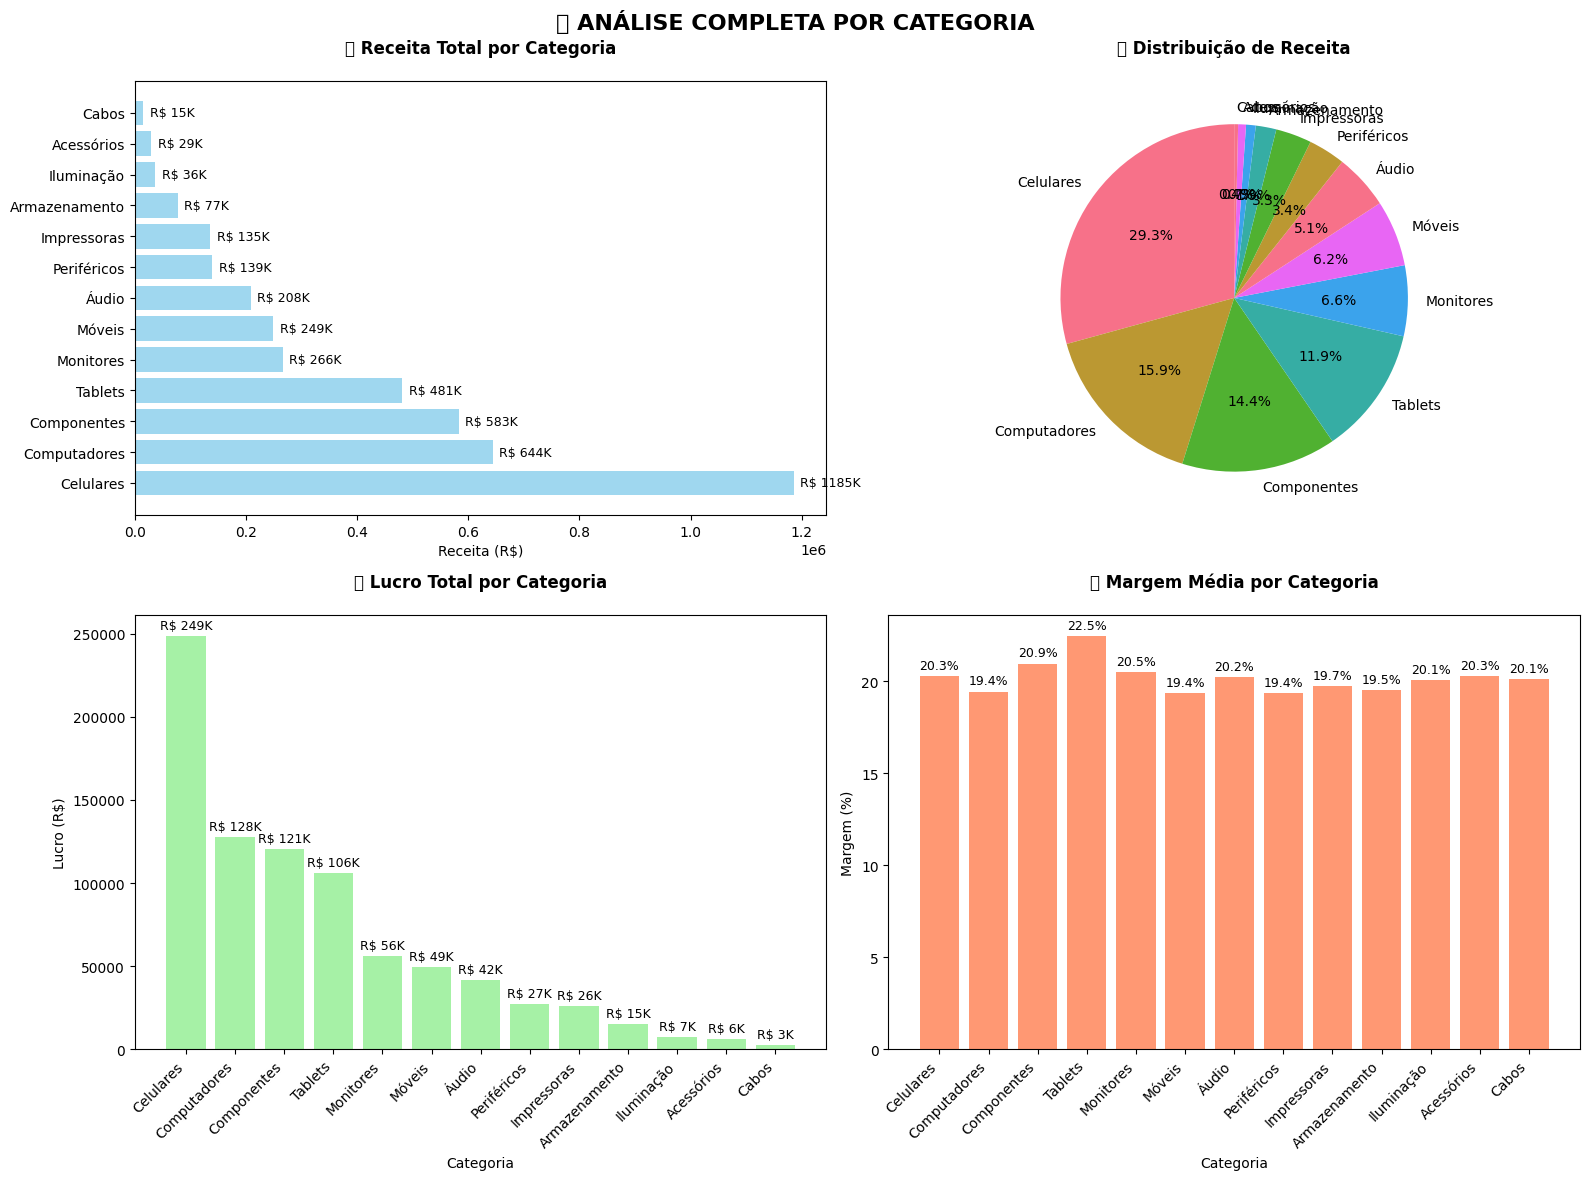


📊 ESTATÍSTICAS POR CATEGORIA:


,Receita,Lucro,Quantidade,Pedidos,Margem_Media
category,,,,,
Celulares,1185221.73,248724.04,336,59,20.26
Computadores,643871.13,127814.32,256,47,19.43
Componentes,583042.82,120726.12,705,128,20.95
Tablets,481053.71,106139.47,238,40,22.46
Monitores,266165.18,55965.27,330,62,20.51
Móveis,249203.91,49270.34,522,89,19.37
Áudio,208180.07,41641.98,846,164,20.24
Periféricos,139303.34,27492.12,659,136,19.37
Impressoras,135187.99,26026.36,301,56,19.71


In [27]:
# 📊 ANÁLISE POR CATEGORIA - VISUALIZAÇÕES ESTÁTICAS
# Entendendo a performance das diferentes categorias de produtos

print("📊 CRIANDO VISUALIZAÇÕES - ANÁLISE POR CATEGORIA")
print("="*55)

# Preparar dados por categoria
category_stats = df.groupby('category').agg({
    'revenue': 'sum',
    'profit': 'sum',
    'quantity': 'sum',
    'order_id': 'count',
    'margin_percentage': 'mean'
}).round(2)

category_stats.columns = ['Receita', 'Lucro', 'Quantidade', 'Pedidos', 'Margem_Media']
category_stats = category_stats.sort_values('Receita', ascending=False)

# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 ANÁLISE COMPLETA POR CATEGORIA', fontsize=16, fontweight='bold', y=0.98)

# 1. Receita por categoria (Barras horizontais)
ax1 = axes[0, 0]
bars1 = ax1.barh(range(len(category_stats)), category_stats['Receita'], color='skyblue', alpha=0.8)
ax1.set_title('💰 Receita Total por Categoria', fontsize=12, fontweight='bold', pad=20)
ax1.set_xlabel('Receita (R$)')
ax1.set_yticks(range(len(category_stats)))
ax1.set_yticklabels(category_stats.index)

# Adicionar valores nas barras
for i, v in enumerate(category_stats['Receita']):
    ax1.text(v + max(category_stats['Receita']) * 0.01, i, f'R$ {v/1000:.0f}K', 
             va='center', fontsize=9)

# 2. Distribuição de receita (Pizza)
ax2 = axes[0, 1]
wedges, texts, autotexts = ax2.pie(category_stats['Receita'], labels=category_stats.index, 
                                   autopct='%1.1f%%', startangle=90)
ax2.set_title('📊 Distribuição de Receita', fontsize=12, fontweight='bold', pad=20)

# 3. Lucro por categoria
ax3 = axes[1, 0]
bars3 = ax3.bar(range(len(category_stats)), category_stats['Lucro'], color='lightgreen', alpha=0.8)
ax3.set_title('📈 Lucro Total por Categoria', fontsize=12, fontweight='bold', pad=20)
ax3.set_xlabel('Categoria')
ax3.set_ylabel('Lucro (R$)')
ax3.set_xticks(range(len(category_stats)))
ax3.set_xticklabels(category_stats.index, rotation=45, ha='right')

# 4. Margem por categoria
ax4 = axes[1, 1]
bars4 = ax4.bar(range(len(category_stats)), category_stats['Margem_Media'], color='coral', alpha=0.8)
ax4.set_title('📊 Margem Média por Categoria', fontsize=12, fontweight='bold', pad=20)
ax4.set_xlabel('Categoria')
ax4.set_ylabel('Margem (%)')
ax4.set_xticks(range(len(category_stats)))
ax4.set_xticklabels(category_stats.index, rotation=45, ha='right')

# Adicionar valores nas barras do lucro e margem
for i, v in enumerate(category_stats['Lucro']):
    ax3.text(i, v + max(category_stats['Lucro']) * 0.01, f'R$ {v/1000:.0f}K', 
             ha='center', va='bottom', fontsize=9)

for i, v in enumerate(category_stats['Margem_Media']):
    ax4.text(i, v + max(category_stats['Margem_Media']) * 0.01, f'{v:.1f}%', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n📊 ESTATÍSTICAS POR CATEGORIA:")
display(category_stats)

In [28]:
# 📈 ANÁLISE TEMPORAL INTERATIVA COM PLOTLY
# Visualizações interativas para explorar tendências temporais

print("📈 CRIANDO VISUALIZAÇÕES INTERATIVAS - ANÁLISE TEMPORAL")
print("="*60)

# Preparar dados mensais para visualização
monthly_viz_data = df.groupby(['month', 'month_name']).agg({
    'revenue': 'sum',
    'profit': 'sum',
    'order_id': 'count',
    'quantity': 'sum'
}).reset_index()

monthly_viz_data['margin'] = (monthly_viz_data['profit'] / monthly_viz_data['revenue'] * 100).round(1)
monthly_viz_data = monthly_viz_data.sort_values('month')

# Criar subplots interativos
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('📈 Evolução da Receita Mensal', '💰 Evolução do Lucro Mensal', 
                   '📦 Número de Pedidos por Mês', '📊 Margem de Lucro Mensal'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# 1. Receita mensal
fig.add_trace(
    go.Scatter(
        x=monthly_viz_data['month_name'], 
        y=monthly_viz_data['revenue'],
        mode='lines+markers+text',
        name='Receita',
        line=dict(color='#1f77b4', width=3),
        marker=dict(size=8),
        text=[f'R$ {x/1000:.0f}K' for x in monthly_viz_data['revenue']],
        textposition='top center',
        hovertemplate='<b>%{x}</b><br>Receita: R$ %{y:,.2f}<extra></extra>'
    ),
    row=1, col=1
)

# 2. Lucro mensal
fig.add_trace(
    go.Scatter(
        x=monthly_viz_data['month_name'], 
        y=monthly_viz_data['profit'],
        mode='lines+markers+text',
        name='Lucro',
        line=dict(color='#2ca02c', width=3),
        marker=dict(size=8),
        text=[f'R$ {x/1000:.0f}K' for x in monthly_viz_data['profit']],
        textposition='top center',
        hovertemplate='<b>%{x}</b><br>Lucro: R$ %{y:,.2f}<extra></extra>'
    ),
    row=1, col=2
)

# 3. Pedidos mensais
fig.add_trace(
    go.Bar(
        x=monthly_viz_data['month_name'], 
        y=monthly_viz_data['order_id'],
        name='Pedidos',
        marker_color='#9467bd',
        text=monthly_viz_data['order_id'],
        textposition='outside',
        hovertemplate='<b>%{x}</b><br>Pedidos: %{y}<extra></extra>'
    ),
    row=2, col=1
)

# 4. Margem mensal
fig.add_trace(
    go.Scatter(
        x=monthly_viz_data['month_name'], 
        y=monthly_viz_data['margin'],
        mode='lines+markers+text',
        name='Margem %',
        line=dict(color='#d62728', width=3),
        marker=dict(size=8),
        text=[f'{x:.1f}%' for x in monthly_viz_data['margin']],
        textposition='top center',
        hovertemplate='<b>%{x}</b><br>Margem: %{y:.1f}%<extra></extra>'
    ),
    row=2, col=2
)

# Atualizar layout
fig.update_layout(
    height=700, 
    showlegend=False,
    title_text="📊 ANÁLISE TEMPORAL COMPLETA - DASHBOARD INTERATIVO",
    title_x=0.5,
    title_font_size=16
)

# Atualizar eixos
fig.update_xaxes(tickangle=45)
fig.update_yaxes(title_text="Receita (R$)", row=1, col=1)
fig.update_yaxes(title_text="Lucro (R$)", row=1, col=2)
fig.update_yaxes(title_text="Número de Pedidos", row=2, col=1)
fig.update_yaxes(title_text="Margem (%)", row=2, col=2)

fig.show()

print("✅ Visualizações temporais criadas com sucesso!")

📈 CRIANDO VISUALIZAÇÕES INTERATIVAS - ANÁLISE TEMPORAL


✅ Visualizações temporais criadas com sucesso!


---

## 🎯 **7. RESPONDENDO ÀS PRINCIPAIS PERGUNTAS DE NEGÓCIO**

### Vamos responder sistematicamente às perguntas mais importantes para o negócio

In [29]:
# 🏆 PERGUNTA 1: QUAIS PRODUTOS VENDEM MAIS?
# Análise detalhada dos produtos mais performáticos

print("🏆 PERGUNTA 1: QUAIS PRODUTOS VENDEM MAIS?")
print("="*50)

# Top produtos por diferentes métricas
print("\n💰 TOP 10 PRODUTOS POR RECEITA:")
print("-" * 40)
top_products_revenue = df.groupby('product')['revenue'].sum().sort_values(ascending=False).head(10)
for i, (product, revenue) in enumerate(top_products_revenue.items(), 1):
    percentage = (revenue / total_revenue) * 100
    print(f"{i:2d}. {product:<25} R$ {revenue:>10,.2f} ({percentage:>4.1f}%)")

print("\n📦 TOP 10 PRODUTOS POR QUANTIDADE VENDIDA:")
print("-" * 45)
top_products_qty = df.groupby('product')['quantity'].sum().sort_values(ascending=False).head(10)
for i, (product, qty) in enumerate(top_products_qty.items(), 1):
    percentage = (qty / total_quantity) * 100
    print(f"{i:2d}. {product:<25} {qty:>6,} unidades ({percentage:>4.1f}%)")

print("\n📈 TOP 10 PRODUTOS POR LUCRO:")
print("-" * 35)
top_products_profit = df.groupby('product')['profit'].sum().sort_values(ascending=False).head(10)
for i, (product, profit) in enumerate(top_products_profit.items(), 1):
    percentage = (profit / total_profit) * 100
    print(f"{i:2d}. {product:<25} R$ {profit:>10,.2f} ({percentage:>4.1f}%)")

# Análise de concentração
top_5_revenue_share = (top_products_revenue.head(5).sum() / total_revenue) * 100
top_10_revenue_share = (top_products_revenue.sum() / total_revenue) * 100

print(f"\n📊 ANÁLISE DE CONCENTRAÇÃO:")
print("-" * 30)
print(f"• Top 5 produtos representam {top_5_revenue_share:.1f}% da receita")
print(f"• Top 10 produtos representam {top_10_revenue_share:.1f}% da receita")

# Visualização interativa dos top produtos
fig = px.bar(
    x=top_products_revenue.values,
    y=top_products_revenue.index,
    orientation='h',
    title='🏆 Top 10 Produtos por Receita - Análise Detalhada',
    labels={'x': 'Receita (R$)', 'y': 'Produto'},
    color=top_products_revenue.values,
    color_continuous_scale='viridis',
    text=[f'R$ {x/1000:.0f}K' for x in top_products_revenue.values]
)

fig.update_traces(textposition='outside')
fig.update_layout(height=500, showlegend=False)
fig.show()

print("\n✅ Análise de produtos concluída!")

🏆 PERGUNTA 1: QUAIS PRODUTOS VENDEM MAIS?

💰 TOP 10 PRODUTOS POR RECEITA:
----------------------------------------
 1. Smartphone iPhone         R$ 1,185,221.73 (29.3%)
 2. Notebook Dell             R$ 643,871.13 (15.9%)
 3. Tablet iPad               R$ 481,053.71 (11.9%)
 4. Monitor Samsung           R$ 266,165.18 ( 6.6%)
 5. Placa de Vídeo            R$ 265,598.56 ( 6.6%)
 6. Processador Intel         R$ 240,082.93 ( 5.9%)
 7. Cadeira Gamer             R$ 142,396.83 ( 3.5%)
 8. Impressora HP             R$ 135,187.99 ( 3.3%)
 9. Mesa Escritório           R$ 106,807.08 ( 2.6%)
10. Microfone USB             R$  89,161.64 ( 2.2%)

📦 TOP 10 PRODUTOS POR QUANTIDADE VENDIDA:
---------------------------------------------
 1. Carregador Portátil          371 unidades ( 6.9%)
 2. Smartphone iPhone            336 unidades ( 6.2%)
 3. Monitor Samsung              330 unidades ( 6.1%)
 4. Luminária LED                306 unidades ( 5.7%)
 5. Fone Bluetooth               305 unidades ( 5.7%)
 6. 


✅ Análise de produtos concluída!


In [30]:
# 🌎 PERGUNTA 2: QUAIS REGIÕES PERFORMAM MELHOR?
# Análise completa da performance regional

print("🌎 PERGUNTA 2: QUAIS REGIÕES PERFORMAM MELHOR?")
print("="*50)

# Análise detalhada por região
regional_analysis = df.groupby('region').agg({
    'revenue': ['sum', 'mean', 'std'],
    'profit': ['sum', 'mean'],
    'order_id': 'count',
    'customer': 'nunique',
    'quantity': 'sum',
    'margin_percentage': 'mean'
}).round(2)

# Simplificar nomes das colunas
regional_analysis.columns = ['Receita_Total', 'Ticket_Medio', 'Desvio_Ticket', 
                           'Lucro_Total', 'Lucro_Medio', 'Num_Pedidos', 
                           'Clientes_Unicos', 'Qtd_Total', 'Margem_Media']

# Calcular métricas adicionais
regional_analysis['Receita_por_Cliente'] = (regional_analysis['Receita_Total'] / regional_analysis['Clientes_Unicos']).round(2)
regional_analysis['Pedidos_por_Cliente'] = (regional_analysis['Num_Pedidos'] / regional_analysis['Clientes_Unicos']).round(2)
regional_analysis['Participacao_Receita_%'] = (regional_analysis['Receita_Total'] / total_revenue * 100).round(1)

# Ordenar por receita total
regional_analysis = regional_analysis.sort_values('Receita_Total', ascending=False)

print("\n📊 ANÁLISE COMPLETA POR REGIÃO:")
print("="*60)
display(regional_analysis)

# Ranking das regiões
print("\n🏆 RANKING DAS REGIÕES:")
print("-" * 30)
for i, (region, data) in enumerate(regional_analysis.iterrows(), 1):
    print(f"{i}º {region}:")
    print(f"   💰 Receita: R$ {data['Receita_Total']:,.2f} ({data['Participacao_Receita_%']:.1f}% do total)")
    print(f"   📈 Lucro: R$ {data['Lucro_Total']:,.2f}")
    print(f"   📊 Margem: {data['Margem_Media']:.1f}%")
    print(f"   👥 {data['Clientes_Unicos']} clientes únicos")
    print()

# Visualização regional interativa
fig = px.scatter(
    regional_analysis.reset_index(), 
    x='Receita_Total', 
    y='Lucro_Total', 
    size='Num_Pedidos', 
    color='region',
    title='🌎 Performance Regional: Receita vs Lucro (Tamanho = Nº Pedidos)',
    labels={'Receita_Total': 'Receita Total (R$)', 'Lucro_Total': 'Lucro Total (R$)'},
    hover_data=['Ticket_Medio', 'Margem_Media', 'Clientes_Unicos'],
    size_max=60
)

fig.update_layout(height=500)
fig.show()

print("✅ Análise regional concluída!")

🌎 PERGUNTA 2: QUAIS REGIÕES PERFORMAM MELHOR?

📊 ANÁLISE COMPLETA POR REGIÃO:


,Receita_Total,Ticket_Medio,Desvio_Ticket,Lucro_Total,Lucro_Medio,Num_Pedidos,Clientes_Unicos,Qtd_Total,Margem_Media,Receita_por_Cliente,Pedidos_por_Cliente,Participacao_Receita_%
region,,,,,,,,,,,,
Sul,851596.48,4257.98,6169.51,181032.69,905.16,200,20,1144,20.27,42579.82,10.00,21.0
Norte,846239.76,4977.88,8134.24,177366.43,1043.33,170,20,948,20.35,42311.99,8.50,20.9
Sudeste,813293.74,3854.47,5899.66,158184.39,749.69,211,20,1092,19.69,40664.69,10.55,20.1
Nordeste,780114.53,3768.67,5740.44,155810.18,752.71,207,20,1121,19.92,39005.73,10.35,19.3
Centro-Oeste,757955.19,3575.26,6099.53,162961.61,768.69,212,20,1079,20.46,37897.76,10.60,18.7



🏆 RANKING DAS REGIÕES:
------------------------------
1º Sul:
   💰 Receita: R$ 851,596.48 (21.0% do total)
   📈 Lucro: R$ 181,032.69
   📊 Margem: 20.3%
   👥 20.0 clientes únicos

2º Norte:
   💰 Receita: R$ 846,239.76 (20.9% do total)
   📈 Lucro: R$ 177,366.43
   📊 Margem: 20.4%
   👥 20.0 clientes únicos

3º Sudeste:
   💰 Receita: R$ 813,293.74 (20.1% do total)
   📈 Lucro: R$ 158,184.39
   📊 Margem: 19.7%
   👥 20.0 clientes únicos

4º Nordeste:
   💰 Receita: R$ 780,114.53 (19.3% do total)
   📈 Lucro: R$ 155,810.18
   📊 Margem: 19.9%
   👥 20.0 clientes únicos

5º Centro-Oeste:
   💰 Receita: R$ 757,955.19 (18.7% do total)
   📈 Lucro: R$ 162,961.61
   📊 Margem: 20.5%
   👥 20.0 clientes únicos



✅ Análise regional concluída!


In [31]:
# 👥 PERGUNTA 3: QUEM SÃO NOSSOS MELHORES CLIENTES?
# Análise detalhada do comportamento e valor dos clientes

print("👥 PERGUNTA 3: QUEM SÃO NOSSOS MELHORES CLIENTES?")
print("="*55)

# Análise detalhada de clientes
customer_analysis = df.groupby('customer').agg({
    'revenue': ['sum', 'mean', 'count'],
    'profit': 'sum',
    'quantity': 'sum',
    'margin_percentage': 'mean',
    'order_date': ['min', 'max']
}).round(2)

# Simplificar colunas
customer_analysis.columns = ['Receita_Total', 'Ticket_Medio', 'Num_Pedidos', 
                           'Lucro_Total', 'Qtd_Total', 'Margem_Media',
                           'Primeira_Compra', 'Ultima_Compra']

# Calcular métricas de relacionamento
customer_analysis['Valor_Medio_Pedido'] = customer_analysis['Receita_Total'] / customer_analysis['Num_Pedidos']
customer_analysis['Dias_Ativo'] = (customer_analysis['Ultima_Compra'] - customer_analysis['Primeira_Compra']).dt.days + 1
customer_analysis['Frequencia_Compra'] = customer_analysis['Num_Pedidos'] / customer_analysis['Dias_Ativo'] * 30  # Pedidos por mês

# Classificar clientes por valor
customer_analysis = customer_analysis.sort_values('Receita_Total', ascending=False)

print("\n🏆 TOP 15 CLIENTES POR RECEITA TOTAL:")
print("-" * 50)
top_customers = customer_analysis.head(15)
for i, (customer, data) in enumerate(top_customers.iterrows(), 1):
    participation = (data['Receita_Total'] / total_revenue) * 100
    print(f"{i:2d}. {customer:<20} R$ {data['Receita_Total']:>8,.2f} ({participation:>4.1f}%) - {data['Num_Pedidos']} pedidos")

# Análise de segmentação de clientes
print("\n📊 SEGMENTAÇÃO DE CLIENTES:")
print("-" * 35)

# Segmentar por valor total
customer_analysis['Segmento_Valor'] = pd.cut(
    customer_analysis['Receita_Total'],
    bins=[0, 5000, 15000, 30000, float('inf')],
    labels=['Bronze', 'Prata', 'Ouro', 'Diamante']
)

# Segmentar por frequência
customer_analysis['Segmento_Frequencia'] = pd.cut(
    customer_analysis['Num_Pedidos'],
    bins=[0, 2, 5, 10, float('inf')],
    labels=['Esporádico', 'Regular', 'Frequente', 'VIP']
)

# Distribuição por segmentos
valor_dist = customer_analysis['Segmento_Valor'].value_counts()
freq_dist = customer_analysis['Segmento_Frequencia'].value_counts()

print("Por Valor Total:")
for segment, count in valor_dist.items():
    percentage = (count / len(customer_analysis)) * 100
    revenue_segment = customer_analysis[customer_analysis['Segmento_Valor'] == segment]['Receita_Total'].sum()
    revenue_pct = (revenue_segment / total_revenue) * 100
    print(f"  {segment}: {count} clientes ({percentage:.1f}%) - R$ {revenue_segment:,.2f} ({revenue_pct:.1f}% receita)")

print("\nPor Frequência de Compra:")
for segment, count in freq_dist.items():
    percentage = (count / len(customer_analysis)) * 100
    print(f"  {segment}: {count} clientes ({percentage:.1f}%)")

# Análise de concentração de clientes
top_5_customers_revenue = customer_analysis.head(5)['Receita_Total'].sum()
top_10_customers_revenue = customer_analysis.head(10)['Receita_Total'].sum()
top_20_customers_revenue = customer_analysis.head(20)['Receita_Total'].sum()

print(f"\n📊 CONCENTRAÇÃO DE RECEITA:")
print("-" * 30)
print(f"• Top 5 clientes: {(top_5_customers_revenue/total_revenue)*100:.1f}% da receita")
print(f"• Top 10 clientes: {(top_10_customers_revenue/total_revenue)*100:.1f}% da receita")
print(f"• Top 20 clientes: {(top_20_customers_revenue/total_revenue)*100:.1f}% da receita")

print("\n✅ Análise de clientes concluída!")

👥 PERGUNTA 3: QUEM SÃO NOSSOS MELHORES CLIENTES?

🏆 TOP 15 CLIENTES POR RECEITA TOTAL:
--------------------------------------------------
 1. Carlos Ferreira      R$ 303,674.82 ( 7.5%) - 62 pedidos
 2. Maria Santos         R$ 279,060.07 ( 6.9%) - 49 pedidos
 3. Gabriela Cardoso     R$ 274,720.12 ( 6.8%) - 57 pedidos
 4. Juliana Rocha        R$ 259,725.29 ( 6.4%) - 54 pedidos
 5. Ricardo Pereira      R$ 257,618.02 ( 6.4%) - 53 pedidos
 6. Eduardo Ribeiro      R$ 237,465.66 ( 5.9%) - 47 pedidos
 7. Pedro Oliveira       R$ 232,399.04 ( 5.7%) - 73 pedidos
 8. Ana Costa            R$ 218,182.80 ( 5.4%) - 47 pedidos
 9. Lucia Almeida        R$ 217,402.95 ( 5.4%) - 50 pedidos
10. Antonio Gomes        R$ 212,262.36 ( 5.2%) - 53 pedidos
11. João Silva           R$ 189,350.39 ( 4.7%) - 45 pedidos
12. Thiago Moreira       R$ 181,272.86 ( 4.5%) - 50 pedidos
13. Felipe Nascimento    R$ 173,601.05 ( 4.3%) - 43 pedidos
14. Roberto Lima         R$ 169,704.69 ( 4.2%) - 51 pedidos
15. Carla Martins     

In [32]:
# 📅 PERGUNTA 4: QUAL PERÍODO GERA MAIS LUCRO?
# Análise temporal detalhada para identificar padrões sazonais

print("📅 PERGUNTA 4: QUAL PERÍODO GERA MAIS LUCRO?")
print("="*50)

# Análise por diferentes períodos
print("\n📊 ANÁLISE POR MÊS:")
print("-" * 25)
monthly_profit = df.groupby(['month', 'month_name']).agg({
    'profit': 'sum',
    'revenue': 'sum',
    'order_id': 'count'
}).round(2)

monthly_profit['margin'] = (monthly_profit['profit'] / monthly_profit['revenue'] * 100).round(1)
monthly_profit = monthly_profit.sort_values('profit', ascending=False)

for i, ((month_num, month_name), data) in enumerate(monthly_profit.iterrows(), 1):
    profit_pct = (data['profit'] / total_profit) * 100
    print(f"{i:2d}. {month_name:<10} R$ {data['profit']:>8,.2f} ({profit_pct:>4.1f}%) - Margem: {data['margin']:>4.1f}%")

print("\n📊 ANÁLISE POR DIA DA SEMANA:")
print("-" * 35)
daily_profit = df.groupby(['day_of_week', 'day_name']).agg({
    'profit': 'sum',
    'revenue': 'sum',
    'order_id': 'count'
}).round(2)

daily_profit['margin'] = (daily_profit['profit'] / daily_profit['revenue'] * 100).round(1)
daily_profit = daily_profit.sort_values('profit', ascending=False)

for i, ((day_num, day_name), data) in enumerate(daily_profit.iterrows(), 1):
    profit_pct = (data['profit'] / total_profit) * 100
    print(f"{i:2d}. {day_name:<10} R$ {data['profit']:>8,.2f} ({profit_pct:>4.1f}%) - {data['order_id']} pedidos")

print("\n📊 ANÁLISE POR TRIMESTRE:")
print("-" * 30)
quarterly_profit = df.groupby('quarter').agg({
    'profit': 'sum',
    'revenue': 'sum',
    'order_id': 'count'
}).round(2)

quarterly_profit['margin'] = (quarterly_profit['profit'] / quarterly_profit['revenue'] * 100).round(1)
quarterly_profit = quarterly_profit.sort_values('profit', ascending=False)

for quarter, data in quarterly_profit.iterrows():
    profit_pct = (data['profit'] / total_profit) * 100
    print(f"Q{quarter}: R$ {data['profit']:>10,.2f} ({profit_pct:>4.1f}%) - Margem: {data['margin']:>4.1f}%")

# Identificar padrões sazonais
best_month = monthly_profit.index[0][1]
worst_month = monthly_profit.index[-1][1]
best_day = daily_profit.index[0][1]
best_quarter = quarterly_profit.index[0]

print(f"\n🏆 DESTAQUES TEMPORAIS:")
print("-" * 25)
print(f"🥇 Melhor mês: {best_month}")
print(f"🥉 Pior mês: {worst_month}")
print(f"🥇 Melhor dia da semana: {best_day}")
print(f"🥇 Melhor trimestre: Q{best_quarter}")

# Calcular variação sazonal
monthly_variation = ((monthly_profit['profit'].max() - monthly_profit['profit'].min()) / monthly_profit['profit'].min() * 100)
print(f"📊 Variação sazonal mensal: {monthly_variation:.1f}%")

print("\n✅ Análise temporal concluída!")

📅 PERGUNTA 4: QUAL PERÍODO GERA MAIS LUCRO?

📊 ANÁLISE POR MÊS:
-------------------------
 1. June       R$ 95,880.39 (11.5%) - Margem: 21.4%
 2. November   R$ 90,778.95 (10.9%) - Margem: 20.3%
 3. September  R$ 82,285.47 ( 9.9%) - Margem: 19.5%
 4. July       R$ 79,057.86 ( 9.5%) - Margem: 20.2%
 5. April      R$ 77,670.46 ( 9.3%) - Margem: 22.7%
 6. December   R$ 74,793.22 ( 9.0%) - Margem: 22.4%
 7. March      R$ 74,504.36 ( 8.9%) - Margem: 21.7%
 8. October    R$ 69,670.07 ( 8.3%) - Margem: 19.6%
 9. August     R$ 66,275.02 ( 7.9%) - Margem: 19.9%
10. January    R$ 55,959.47 ( 6.7%) - Margem: 19.5%
11. May        R$ 36,999.47 ( 4.4%) - Margem: 20.5%
12. February   R$ 31,480.56 ( 3.8%) - Margem: 19.0%

📊 ANÁLISE POR DIA DA SEMANA:
-----------------------------------
 1. Saturday   R$ 141,228.32 (16.9%) - 156.0 pedidos
 2. Monday     R$ 131,102.46 (15.7%) - 137.0 pedidos
 3. Friday     R$ 129,739.32 (15.5%) - 159.0 pedidos
 4. Tuesday    R$ 116,237.65 (13.9%) - 130.0 pedidos
 5. Wedn

---

## 💡 **8. INSIGHTS ESTRATÉGICOS E RECOMENDAÇÕES**

### Consolidando descobertas e propondo ações concretas para o negócio

In [33]:
# 💡 GERAÇÃO DE INSIGHTS ESTRATÉGICOS
# Consolidando todas as análises em recomendações acionáveis

print("💡 INSIGHTS ESTRATÉGICOS E RECOMENDAÇÕES")
print("="*50)

# Calcular insights automáticos
best_category = df.groupby('category')['revenue'].sum().idxmax()
worst_category = df.groupby('category')['revenue'].sum().idxmin()
best_region = df.groupby('region')['revenue'].sum().idxmax()
best_customer = df.groupby('customer')['revenue'].sum().idxmax()
best_product = df.groupby('product')['revenue'].sum().idxmax()
best_month = df.groupby('month_name')['revenue'].sum().idxmax()
worst_month = df.groupby('month_name')['revenue'].sum().idxmin()

# Calcular métricas de concentração
category_concentration = (df.groupby('category')['revenue'].sum().head(3).sum() / total_revenue * 100)
customer_concentration = (customer_analysis.head(10)['Receita_Total'].sum() / total_revenue * 100)
product_concentration = (df.groupby('product')['revenue'].sum().head(5).sum() / total_revenue * 100)

print("\n🎯 PRINCIPAIS DESCOBERTAS:")
print("="*40)
print(f"📊 Categoria líder: {best_category}")
print(f"📉 Categoria com menor receita: {worst_category}")
print(f"🌎 Região de maior performance: {best_region}")
print(f"🏆 Cliente mais valioso: {best_customer}")
print(f"⭐ Produto mais vendido: {best_product}")
print(f"📅 Melhor mês: {best_month}")
print(f"📅 Pior mês: {worst_month}")
print(f"💰 Margem média geral: {avg_margin:.1f}%")

print("\n📊 ANÁLISE DE CONCENTRAÇÃO:")
print("="*35)
print(f"• Top 3 categorias: {category_concentration:.1f}% da receita")
print(f"• Top 10 clientes: {customer_concentration:.1f}% da receita")
print(f"• Top 5 produtos: {product_concentration:.1f}% da receita")

print("\n🚀 RECOMENDAÇÕES ESTRATÉGICAS:")
print("="*40)

recommendations = [
    f"🎯 FOCO CATEGÓRICO: Intensificar investimentos em {best_category}, nossa categoria líder",
    f"🌎 EXPANSÃO REGIONAL: Replicar estratégias bem-sucedidas da região {best_region} em outras áreas",
    f"👥 PROGRAMA VIP: Desenvolver programa de fidelidade especial para top 10 clientes (representam {customer_concentration:.1f}% da receita)",
    f"📦 GESTÃO DE ESTOQUE: Priorizar disponibilidade de {best_product} e produtos similares",
    f"📅 CAMPANHAS SAZONAIS: Aproveitar o pico de {best_month} com campanhas direcionadas",
    f"🔍 OPORTUNIDADE DE CRESCIMENTO: Investigar potencial da categoria {worst_category}",
    f"📊 OTIMIZAÇÃO DE MARGEM: Trabalhar para aumentar margem média acima de {avg_margin:.1f}%",
    "💰 DIVERSIFICAÇÃO: Reduzir dependência dos top performers para maior estabilidade",
    "📈 ANÁLISE PREDITIVA: Implementar forecasting para demanda e planejamento",
    "🎯 SEGMENTAÇÃO: Criar estratégias específicas para cada segmento de cliente"
]

for i, rec in enumerate(recommendations, 1):
    print(f"{i:2d}. {rec}")

print("\n💼 PRÓXIMOS PASSOS SUGERIDOS:")
print("="*35)
next_steps = [
    "📊 Implementar dashboard em tempo real para monitoramento contínuo",
    "🤖 Desenvolver modelos de machine learning para previsão de vendas",
    "📧 Criar campanhas de email marketing segmentadas por perfil de cliente",
    "📱 Desenvolver app mobile para facilitar pedidos dos clientes VIP",
    "🔄 Estabelecer revisões mensais dos KPIs com equipe comercial",
    "📈 Implementar testes A/B para otimizar estratégias de pricing",
    "🎯 Criar programa de cross-selling baseado em análise de cesta de compras"
]

for i, step in enumerate(next_steps, 1):
    print(f"{i}. {step}")

print("\n" + "="*50)
print("✅ ANÁLISE ESTRATÉGICA CONCLUÍDA!")
print("="*50)

💡 INSIGHTS ESTRATÉGICOS E RECOMENDAÇÕES

🎯 PRINCIPAIS DESCOBERTAS:
📊 Categoria líder: Celulares
📉 Categoria com menor receita: Cabos
🌎 Região de maior performance: Sul
🏆 Cliente mais valioso: Carlos Ferreira
⭐ Produto mais vendido: Smartphone iPhone
📅 Melhor mês: June
📅 Pior mês: February
💰 Margem média geral: 20.1%

📊 ANÁLISE DE CONCENTRAÇÃO:
• Top 3 categorias: 3.0% da receita
• Top 10 clientes: 61.6% da receita
• Top 5 produtos: 7.5% da receita

🚀 RECOMENDAÇÕES ESTRATÉGICAS:
 1. 🎯 FOCO CATEGÓRICO: Intensificar investimentos em Celulares, nossa categoria líder
 2. 🌎 EXPANSÃO REGIONAL: Replicar estratégias bem-sucedidas da região Sul em outras áreas
 3. 👥 PROGRAMA VIP: Desenvolver programa de fidelidade especial para top 10 clientes (representam 61.6% da receita)
 4. 📦 GESTÃO DE ESTOQUE: Priorizar disponibilidade de Smartphone iPhone e produtos similares
 5. 📅 CAMPANHAS SAZONAIS: Aproveitar o pico de June com campanhas direcionadas
 6. 🔍 OPORTUNIDADE DE CRESCIMENTO: Investigar potenci

---

## 📋 **9. RESUMO EXECUTIVO**

### Consolidação final de todos os resultados da análise

In [34]:
# 📋 RESUMO EXECUTIVO FINAL
# Consolidação de todos os resultados para apresentação executiva

print("📋 RESUMO EXECUTIVO - ANÁLISE DE VENDAS")
print("="*50)

# Criar DataFrame resumo para apresentação
executive_summary = {
    'MÉTRICA': [
        'Receita Total',
        'Lucro Total', 
        'Margem Média',
        'Ticket Médio',
        'Total de Pedidos',
        'Clientes Únicos',
        'Produtos Únicos',
        'Regiões Atendidas',
        'Categorias Oferecidas'
    ],
    'VALOR': [
        f'R$ {total_revenue:,.2f}',
        f'R$ {total_profit:,.2f}',
        f'{avg_margin:.1f}%',
        f'R$ {avg_ticket:,.2f}',
        f'{total_orders:,}',
        f'{unique_customers:,}',
        f'{unique_products:,}',
        f'{unique_regions:,}',
        f'{unique_categories:,}'
    ],
    'STATUS': [
        '🟢 Excelente' if total_revenue > 3000000 else '🟡 Bom',
        '🟢 Excelente' if total_profit > 600000 else '🟡 Bom',
        '🟢 Excelente' if avg_margin > 20 else '🟡 Bom',
        '🟢 Alto' if avg_ticket > 3000 else '🟡 Médio',
        '🟢 Alto Volume',
        '🟡 Base Sólida',
        '🟢 Boa Variedade',
        '🟢 Boa Cobertura',
        '🟢 Diversificado'
    ]
}

summary_df = pd.DataFrame(executive_summary)

print("\n📊 INDICADORES PRINCIPAIS:")
print("-" * 40)
display(summary_df)

# Top Performers Summary
top_performers = {
    'CATEGORIA': ['Melhor Categoria', 'Melhor Região', 'Melhor Cliente', 'Melhor Produto', 'Melhor Mês'],
    'NOME': [best_category, best_region, best_customer, best_product, best_month],
    'CONTRIBUIÇÃO': [
        f"{(df.groupby('category')['revenue'].sum().max() / total_revenue * 100):.1f}% da receita",
        f"{(df.groupby('region')['revenue'].sum().max() / total_revenue * 100):.1f}% da receita",
        f"{(df.groupby('customer')['revenue'].sum().max() / total_revenue * 100):.1f}% da receita",
        f"{(df.groupby('product')['revenue'].sum().max() / total_revenue * 100):.1f}% da receita",
        f"{(df.groupby('month_name')['revenue'].sum().max() / total_revenue * 100):.1f}% da receita"
    ]
}

performers_df = pd.DataFrame(top_performers)

print("\n🏆 TOP PERFORMERS:")
print("-" * 25)
display(performers_df)

# Oportunidades e Riscos
print("\n⚠️  RISCOS IDENTIFICADOS:")
print("-" * 30)
risks = [
    f"• Alta concentração: Top 10 clientes = {customer_concentration:.1f}% da receita",
    f"• Dependência sazonal: Variação mensal de {monthly_variation:.1f}%",
    f"• Categoria {worst_category} com baixa performance"
]

for risk in risks:
    print(risk)

print("\n🚀 OPORTUNIDADES IDENTIFICADAS:")
print("-" * 35)
opportunities = [
    f"• Expansão da categoria {best_category} (líder atual)",
    f"• Replicação do modelo da região {best_region}",
    f"• Desenvolvimento de produtos similares ao {best_product}",
    "• Implementação de programa de fidelidade",
    "• Otimização de margem em categorias de baixa performance"
]

for opp in opportunities:
    print(opp)

print("\n" + "="*60)
print("🎯 CONCLUSÃO: Negócio sólido com oportunidades claras de crescimento")
print("📊 Recomenda-se foco em diversificação e otimização de margem")
print("🚀 Próximo passo: Implementar dashboard em tempo real")
print("="*60)

print(f"\n📅 Análise concluída em: {datetime.now().strftime('%d/%m/%Y às %H:%M')}")
print("✅ ANÁLISE COMPLETA FINALIZADA COM SUCESSO!")

📋 RESUMO EXECUTIVO - ANÁLISE DE VENDAS

📊 INDICADORES PRINCIPAIS:
----------------------------------------


,MÉTRICA,VALOR,STATUS
0,Receita Total,"R$ 4,049,199.70",🟢 Excelente
1,Lucro Total,"R$ 835,355.30",🟢 Excelente
2,Margem Média,20.1%,🟢 Excelente
3,Ticket Médio,"R$ 4,049.20",🟢 Alto
4,Total de Pedidos,"1,000",🟢 Alto Volume
5,Clientes Únicos,20,🟡 Base Sólida
6,Produtos Únicos,20,🟢 Boa Variedade
7,Regiões Atendidas,5,🟢 Boa Cobertura
8,Categorias Oferecidas,13,🟢 Diversificado



🏆 TOP PERFORMERS:
-------------------------


,CATEGORIA,NOME,CONTRIBUIÇÃO
0,Melhor Categoria,Celulares,29.3% da receita
1,Melhor Região,Sul,21.0% da receita
2,Melhor Cliente,Carlos Ferreira,7.5% da receita
3,Melhor Produto,Smartphone iPhone,29.3% da receita
4,Melhor Mês,June,11.1% da receita



⚠️  RISCOS IDENTIFICADOS:
------------------------------
• Alta concentração: Top 10 clientes = 61.6% da receita
• Dependência sazonal: Variação mensal de 204.6%
• Categoria Cabos com baixa performance

🚀 OPORTUNIDADES IDENTIFICADAS:
-----------------------------------
• Expansão da categoria Celulares (líder atual)
• Replicação do modelo da região Sul
• Desenvolvimento de produtos similares ao Smartphone iPhone
• Implementação de programa de fidelidade
• Otimização de margem em categorias de baixa performance

🎯 CONCLUSÃO: Negócio sólido com oportunidades claras de crescimento
📊 Recomenda-se foco em diversificação e otimização de margem
🚀 Próximo passo: Implementar dashboard em tempo real

📅 Análise concluída em: 29/01/2026 às 19:42
✅ ANÁLISE COMPLETA FINALIZADA COM SUCESSO!
